In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss 


In [2]:
read_file = pd.read_excel (r'Statistics_Assessment_Data.xlsx')
read_file.to_csv (r'ABstatistics.csv', index = None, header=True)

In [3]:
data= pd.read_csv("ABstatistics.csv")

In [4]:
data

,UserID,Brand,Test Group,Converted
0,7573340,Casino A,B,1
1,5465339,Casino A,A,0
2,7516520,Casino A,B,0
3,7616973,Casino A,A,1
4,7341455,Casino A,B,0
...,...,...,...,...
346,7597629,Casino A,A,1
347,6059769,Casino A,B,1
348,7369482,Casino A,B,0
349,7467535,Casino A,B,1


In [5]:
data.rename(columns={"Test Group": "Group",}, inplace=True)

In [6]:
data[data['Group'] == 'A'].groupby(data['Converted']==1).agg(['count'])

,UserID,Brand,Group,Converted
,count,count,count,count
Converted,,,,
False,92,92,92,92
True,82,82,82,82


In [7]:
data[data['Group'] == 'B'].groupby(data['Converted']==1).agg(['count'])

,UserID,Brand,Group,Converted
,count,count,count,count
Converted,,,,
False,114,114,114,114
True,63,63,63,63


In [8]:
data[data['Group'] == 'A'].shape[0]

174

In [9]:
data[data['Group'] == 'B'].shape[0]

177

In [10]:
data['Converted'].shape[0]

351

In [11]:
n_control, n_variant = 174, 177
converted_a, converted_b = 82, 63
crv_control, crv_variant = converted_a / n_control, converted_b / n_variant

In [12]:
crv_control, crv_variant

(0.47126436781609193, 0.3559322033898305)

In [13]:
pd.Series(data["UserID"]).is_unique

True

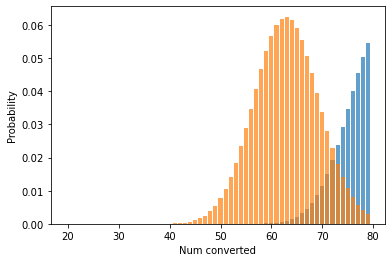

In [14]:
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np


conversions = np.arange(20, 80)
prob_a = binom(n_control, crv_control).pmf(conversions)
prob_b = binom(n_variant, crv_variant).pmf(conversions)


plt.bar(conversions, prob_a, label="A", alpha=0.7)
plt.bar(conversions, prob_b, label="B", alpha=0.7)
plt.xlabel("Num converted"); plt.ylabel("Probability");

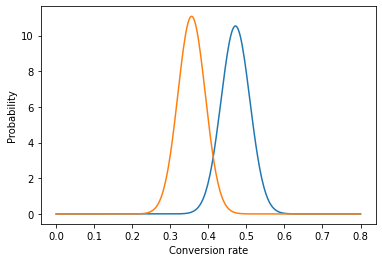

In [15]:
from scipy.stats import norm



std_a = np.sqrt(crv_control * (1 - crv_control) / n_control)
std_b = np.sqrt(crv_variant * (1 - crv_variant) / n_variant)

conversions = np.linspace(0, 0.8, 300)
prob_a = norm(crv_control, std_a).pdf(conversions)
prob_b = norm(crv_variant, std_b).pdf(conversions)


plt.plot(conversions, prob_a, label="A")
plt.plot(conversions, prob_b, label="B")
plt.xlabel("Conversion rate"); plt.ylabel("Probability");

In [16]:
# Variance
var_control = crv_control * (1-crv_control) 
var_variant = crv_variant * (1-crv_variant)

conversions_control = crv_control * n_control
conversions_variant = crv_variant * n_variant

print('N - Control: {:0.0f} , Variant: {:0.0f}'.format(n_control, n_variant))
print('CRV - Control: {:0.4f} , Variant: {:0.4f}'.format(crv_control, crv_variant))
print('Conversions -  Control: {:0.0f} , Variant: {:0.0f}'.format(conversions_control, conversions_variant))
print('Var -  Control: {:0.4f} , Variant: {:0.4f}'.format(var_control, var_variant))

# Create combined random variable S
mean_control = crv_control
mean_variant = crv_variant
S_mean = mean_variant - mean_control
S_var = (var_control/n_control) + (var_variant/n_variant)

print('------------')
Z_score = S_mean / np.sqrt(S_var)
print('Z-score: {:0.4f}'.format(Z_score))

N - Control: 174 , Variant: 177
CRV - Control: 0.4713 , Variant: 0.3559
Conversions -  Control: 82 , Variant: 63
Var -  Control: 0.2492 , Variant: 0.2292
------------
Z-score: -2.2085


In [18]:
import scipy.stats as st

p_value_1_tail = 1-st.norm.cdf(-2.2085)
p_value_2_tail = p_value_1_tail * 2

print('p-value: {:0.6f}'.format(p_value_2_tail))

p-value: 1.972791
